In [1]:
import pandas as pd
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import os

In [23]:
data= pd.read_csv('Transfos_data_prov.csv', sep = ";")

In [42]:
data=data.sample(frac = 1)

## ACP

In [43]:
data_pca=data.drop(columns=['ORIGIN-','SEXE-','ID'])

In [44]:
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

n_comp = 2

X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


pcs = pca.components_
X_projected = pca.transform(X_scaled)
X=[]
Y=[]
for i in range(len(X_projected)):
    X.append(X_projected[i][0])
    Y.append(X_projected[i][1])
data_pca["X"]=X
data_pca["Y"]=Y

In [45]:
data_pca

,0-,1-,2-,3-,4-,5-,6-,7-,8-,9-,...,1017-,1018-,1019-,1020-,1021-,1022-,1023-,1024-,X,Y
365,0.267514,0.384389,0.339194,0.228453,0.149709,0.126253,0.150955,0.270027,0.362705,0.239289,...,3.718171e-07,3.628499e-07,3.537709e-07,3.610717e-07,3.591590e-07,3.446279e-07,3.436491e-07,3.114648e-07,3.286206,-6.278846
641,0.363688,0.718579,0.844590,0.667584,0.320282,0.311253,0.298625,0.151928,0.106454,0.097428,...,3.662132e-07,3.691615e-07,3.502601e-07,3.646801e-07,3.683021e-07,3.637949e-07,3.566172e-07,3.107691e-07,-11.721013,-6.123385
553,0.162393,0.368054,0.393856,0.272140,0.232621,0.314252,0.364923,0.493412,1.598596,4.616429,...,4.120811e-07,3.991459e-07,4.281941e-07,4.488092e-07,4.457342e-07,4.092018e-07,3.985086e-07,3.993896e-07,1.433555,-4.707047
181,0.122018,0.197166,0.188939,0.155068,0.158401,0.219107,0.339395,0.772315,1.849148,4.040040,...,2.755847e-07,2.509235e-07,2.472840e-07,2.483060e-07,2.751883e-07,2.881439e-07,2.985416e-07,2.587204e-07,-6.430258,-5.550848
50,0.041812,0.127734,0.456048,0.381355,0.075704,0.063795,0.086073,0.075304,0.075284,0.085033,...,9.093935e-07,9.382823e-07,9.653303e-07,9.904951e-07,9.443560e-07,9.685256e-07,9.934287e-07,9.297577e-07,-1.420576,-3.614781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.157134,0.419362,0.493342,0.355946,1.073455,1.086359,0.269538,0.139294,0.120788,0.122946,...,9.800173e-07,9.767010e-07,9.616241e-07,9.607473e-07,9.560280e-07,9.516423e-07,9.554790e-07,9.355762e-07,-1.199463,-3.949142
725,0.382486,0.795310,1.120832,1.014230,1.066888,0.965578,0.667796,0.474670,0.436184,0.895997,...,1.867501e-07,1.877678e-07,1.830794e-07,1.931193e-07,1.907523e-07,1.873614e-07,1.915647e-07,1.865112e-07,-14.032145,-5.252840
420,3.089500,3.864595,3.000581,1.808793,1.303341,1.177602,1.093400,1.193939,2.091402,4.303230,...,4.620502e-06,4.622193e-06,4.629769e-06,4.587837e-06,4.595492e-06,4.583788e-06,4.597684e-06,4.598346e-06,-4.140261,2.604182
419,0.259518,0.339801,0.331200,0.261578,0.243896,0.256925,0.263520,0.356879,0.615472,1.771495,...,2.859897e-07,2.662099e-07,2.791340e-07,2.892487e-07,2.969388e-07,3.105857e-07,3.154219e-07,2.770252e-07,-8.807044,-5.562770


In [46]:
import plotly.express as px
data_pca['SEXE-']=data['SEXE-']
fig=px.scatter(data_pca, x="X", y="Y",color='SEXE-')
fig


# RANDOM FOREST

In [47]:
data

,ID,0-,1-,2-,3-,4-,5-,6-,7-,8-,...,1017-,1018-,1019-,1020-,1021-,1022-,1023-,1024-,SEXE-,ORIGIN-
365,LibriSpeech/9090.flac,0.267514,0.384389,0.339194,0.228453,0.149709,0.126253,0.150955,0.270027,0.362705,...,3.718171e-07,3.628499e-07,3.537709e-07,3.610717e-07,3.591590e-07,3.446279e-07,3.436491e-07,3.114648e-07,1,TRAIN
641,LibriSpeech/9366.flac,0.363688,0.718579,0.844590,0.667584,0.320282,0.311253,0.298625,0.151928,0.106454,...,3.662132e-07,3.691615e-07,3.502601e-07,3.646801e-07,3.683021e-07,3.637949e-07,3.566172e-07,3.107691e-07,1,TRAIN
553,LibriSpeech/9278.flac,0.162393,0.368054,0.393856,0.272140,0.232621,0.314252,0.364923,0.493412,1.598596,...,4.120811e-07,3.991459e-07,4.281941e-07,4.488092e-07,4.457342e-07,4.092018e-07,3.985086e-07,3.993896e-07,0,TRAIN
181,LibriSpeech/5104-33406-0000.flac,0.122018,0.197166,0.188939,0.155068,0.158401,0.219107,0.339395,0.772315,1.849148,...,2.755847e-07,2.509235e-07,2.472840e-07,2.483060e-07,2.751883e-07,2.881439e-07,2.985416e-07,2.587204e-07,0,TRAIN
50,LibriSpeech/19-198-0000.flac,0.041812,0.127734,0.456048,0.381355,0.075704,0.063795,0.086073,0.075304,0.075284,...,9.093935e-07,9.382823e-07,9.653303e-07,9.904951e-07,9.443560e-07,9.685256e-07,9.934287e-07,9.297577e-07,1,TRAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,LibriSpeech/9390.flac,0.157134,0.419362,0.493342,0.355946,1.073455,1.086359,0.269538,0.139294,0.120788,...,9.800173e-07,9.767010e-07,9.616241e-07,9.607473e-07,9.560280e-07,9.516423e-07,9.554790e-07,9.355762e-07,1,TRAIN
725,LibriSpeech/9450.flac,0.382486,0.795310,1.120832,1.014230,1.066888,0.965578,0.667796,0.474670,0.436184,...,1.867501e-07,1.877678e-07,1.830794e-07,1.931193e-07,1.907523e-07,1.873614e-07,1.915647e-07,1.865112e-07,0,TRAIN
420,LibriSpeech/9145.flac,3.089500,3.864595,3.000581,1.808793,1.303341,1.177602,1.093400,1.193939,2.091402,...,4.620502e-06,4.622193e-06,4.629769e-06,4.587837e-06,4.595492e-06,4.583788e-06,4.597684e-06,4.598346e-06,0,TRAIN
419,LibriSpeech/9144.flac,0.259518,0.339801,0.331200,0.261578,0.243896,0.256925,0.263520,0.356879,0.615472,...,2.859897e-07,2.662099e-07,2.791340e-07,2.892487e-07,2.969388e-07,3.105857e-07,3.154219e-07,2.770252e-07,0,TRAIN


In [48]:
X_train=data[data['ORIGIN-']=='TRAIN'].drop(columns=['SEXE-','ORIGIN-','ID']).values
y_train=data[data['ORIGIN-']=='TRAIN']['SEXE-'].values
X_test=data[data['ORIGIN-']=='TEST'].drop(columns=['SEXE-','ORIGIN-','ID']).values
y_test=data[data['ORIGIN-']=='TEST']['SEXE-'].values

In [49]:
X_train

array([[2.67514318e-01, 3.84388924e-01, 3.39194030e-01, ...,
        3.44627921e-07, 3.43649134e-07, 3.11464817e-07],
       [3.63687515e-01, 7.18579412e-01, 8.44590425e-01, ...,
        3.63794896e-07, 3.56617221e-07, 3.10769082e-07],
       [1.62392780e-01, 3.68054330e-01, 3.93855691e-01, ...,
        4.09201817e-07, 3.98508575e-07, 3.99389563e-07],
       ...,
       [3.08949971e+00, 3.86459541e+00, 3.00058055e+00, ...,
        4.58378827e-06, 4.59768398e-06, 4.59834610e-06],
       [2.59518296e-01, 3.39801013e-01, 3.31200093e-01, ...,
        3.10585733e-07, 3.15421858e-07, 2.77025180e-07],
       [2.44086380e+01, 1.22576542e+01, 9.02030110e-01, ...,
        1.52408084e-05, 1.52436542e-05, 1.52158318e-05]])

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[i for i in range(1,100,10)]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)
clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())


KeyboardInterrupt: 

In [19]:
clf

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100],
                         'n_estimators': [2, 20, 40, 60, 80, 100]})

In [20]:
clf.best_estimator_

RandomForestRegressor(max_depth=80)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=5,n_estimators=110, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94

In [68]:
x=[]
y=[]
for i in range(15,25,1):
    x.append(i)
    clf = RandomForestClassifier(max_depth=i,n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    y.append(clf.score(X_test, y_test))

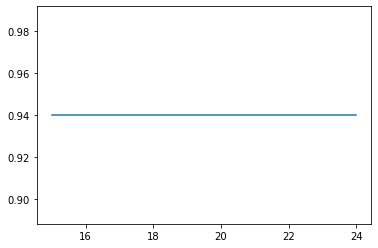

In [69]:
plt.plot(x,y)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=5,n_estimators=110, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94

# Shap Values

In [71]:

import shap
explainer = shap.TreeExplainer(clf)

## Par individu

In [73]:
X_test=data[data['ORIGIN-']=='TEST'].drop(columns=['SEXE-','ORIGIN-','ID'])

In [74]:
choosen_instance = X_test.iloc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

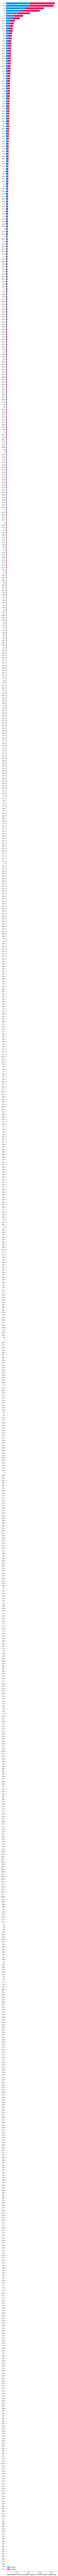

In [75]:
shap.summary_plot(shap_values, X_test,plot_type='bar',max_display=1024)